# Financial Time Series

Financial time series data is one of the most important types of data in finance. This is data indexed by date and/or time. For example, prices of stocks over time represent financial time series data. Similarly, the EUR/USD exchange rate over time represents a financial time series; the exchange rate is quoted in brief intervals of time, and a collection of such quotes then is a time series of exchange rates. 

There is no financial discipline that gets by without considering time an important factor. This mainly is the same as with physics and other sciences. The major tool to cope with time series data in Python is pandas. Wes McKinney, the original and main author of pandas, started developing the library when working as an analyst at AQR Capital Management, a large hedge fund. It is safe to say that pandas has been designed from the ground up to work with financial time series data.

## Financial Data

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
file_url = "https://raw.githubusercontent.com/GeorgeMavroidis/PythonForFinance/master/Data/tr_eikon_eod_data.csv"
data = pd.read_csv(file_url, index_col=0, parse_dates=True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,156.410000,78.630,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.410000,78.760,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.050000,83.810,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [16]:
data.tail() # Last 5 rows

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR world
symbols for financial instruments are called Reuters Instrument Codes (RICs). The
financial instruments that the single RICs represent are:

In [17]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

for ric, name in zip(data.columns, instruments):
  print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [18]:
data.describe().round(2) # describe() provedies useful standard statistics per column

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [19]:
# There are also options to customize what types of statistic to derive and display
data.mean()

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

In [20]:
data.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
median,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


## Changes over Time

Statistical analysis methods are often based on changes over time and not the absolute values themselves. There are multiple options to calculate the changes in a time
series over time, including absolute differences, percentage changes, and logarithmic
(log) returns.

In [21]:
# For absolute differences
data.diff().head() # diff() provides the absolute changes between two index values

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [22]:
data.diff().mean() # And of course they can be applied in addition

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred

In [23]:
data.pct_change().round(3).head() # pct_change() calculates the percentage change between two index values

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


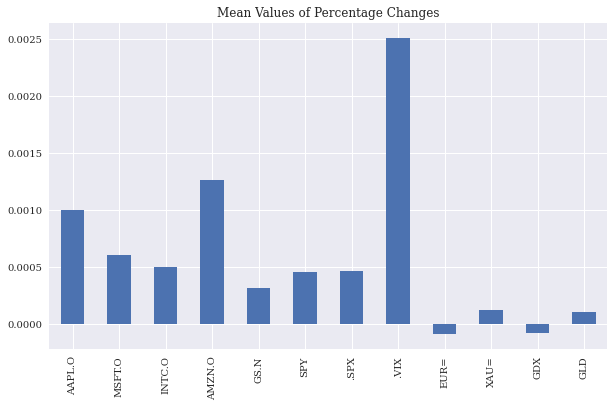

In [25]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6), title='Mean Values of Percentage Changes')

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial conext. Next we will lok at the cumulative log returns for the single financial time series. This type of plot leads to some form of *normalization*

In [26]:
rets = np.log(data/data.shift(1)) # Calculate the log return in vectorized fashion
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


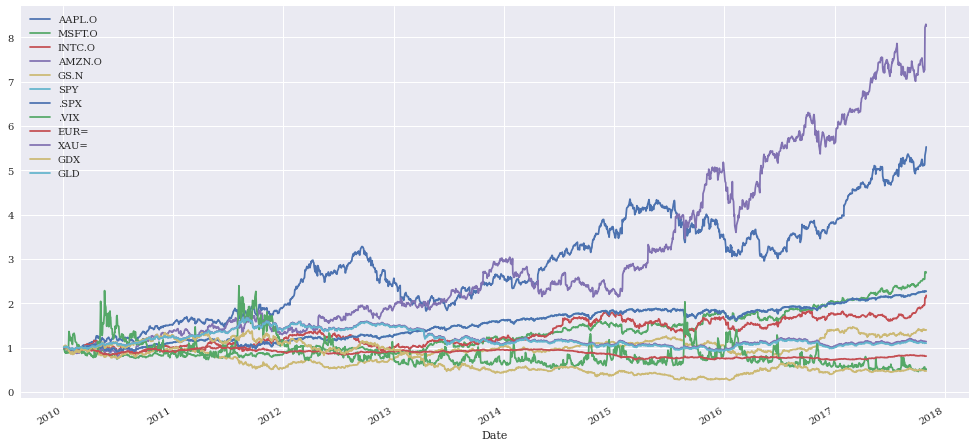

In [29]:
rets.cumsum().apply(np.exp).plot(figsize=(17,8)) # Plots the cumulative log returns over time

## Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weeklt or monthly observations

In [32]:
data.resample('1w', label='right').last().head() # Resampling to 1 week intervals

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


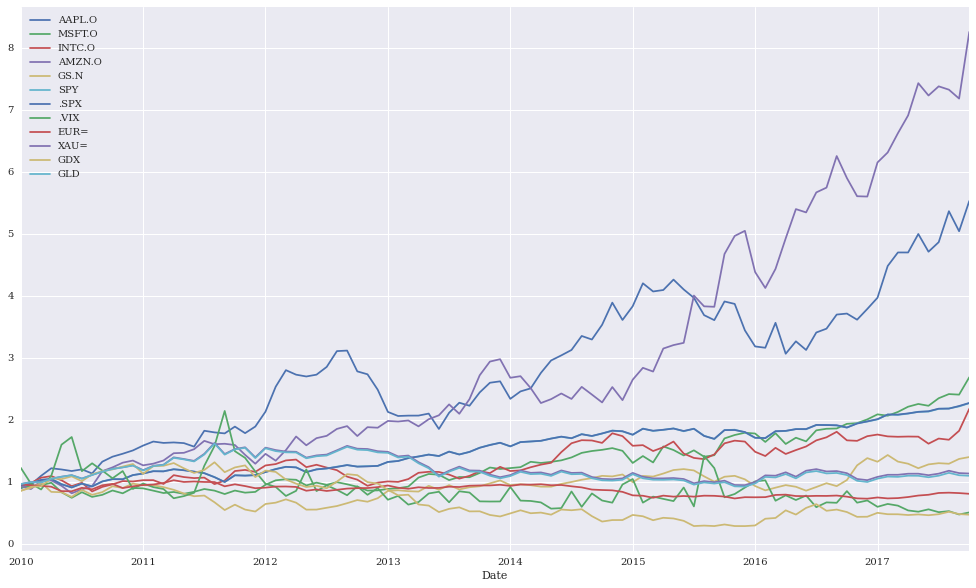

In [35]:
data.resample('1m', label='right').last().head() # Resampling to 1 month

# Plot the cumulative log returns over time
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(17, 10)) 

## Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders.

In [36]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


In [37]:
window = 20 # Defines the window (The number of index values to include)
data['min'] = data[sym].rolling(window=window).min() # Calculates the rolling minimum value
data['mean'] = data[sym].rolling(window=window).mean() # The rolling mean value
data['std'] = data[sym].rolling(window=window).std() # The rolling standard deviation
data['median'] = data[sym].rolling(window=window).median() # The rolling median value
data['max'] = data[sym].rolling(window=window).max() # Rolling maximum value
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() # Calculates the exponentially weighted moving average

data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


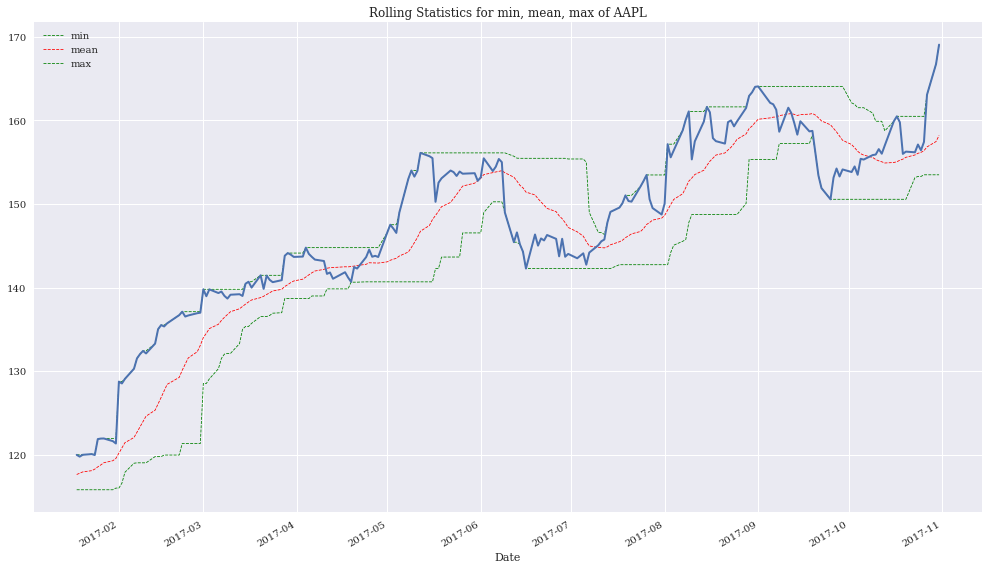

In [40]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(17, 10), style=['g--', 'r--', 'g--'], lw=0.8) # Plot the rolling stats
data[sym].iloc[-200:].plot(ax=ax, lw=2.0, title="Rolling Statistics for min, mean, max of AAPL") # Add the original timeseries to the plot

## A Technical Analysis Example

Rolling statistics are a major tool in the so-called technical analysis of stocks, as com‐
pared to the fundamental analysis which focuses, for instance, on financial reports
and the strategic positions of the company whose stock is being analyzed.

A decades-old trading strategy based on technical analysis is using two simple moving
averages (SMAs). The idea is that the trader should go long on a stock (or financial
instrument in general) when the shorter-term SMA is above the longer-term SMA
and should go short when the opposite holds true. The concepts can be made precise
with pandas and the capabilities of the DataFrame object.

Rolling statistics are generally only calculated when there is enough data given the
window parameter specification. As Figure 8-6 shows, the SMA time series only start
at the day for which there is enough data given the specific parameterization: